In [1]:
# Data extraction and exploration


In [2]:
# import default libraries
import pathlib
import zipfile

# import installed libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# matplotlib darkmode
plt.style.use("dark_background")

# styling
plt.rcParams.update({
    "font.size" : 14
})



In [3]:
with zipfile.ZipFile("../data/level0/evalu9-QIQTQC.srama_stuebig.4706.txt.zip", "r") as zip_ref:
    zip_ref.extractall("../data/level0")

In [4]:
COL_NAMES = ['REF_NR', \
             'SECONDS', \
             'PSU_VEL', \
             'QP_VEL', \
             'PSU_CHARGE', \
             'MP_PEAKS', \
             'HVC', \
             'X', \
             'Y', \
             'ACC', \
             '#1', \
             'QI', \
             'QI_CHARGE', \
             'QI_T2', \
             'QI_T4', \
             'QI_TR', \
             '#2', \
             'QC', \
             'QC_CHARGE', \
             'QC_T2', \
             'QC_T4', \
             'QC_TR', \
             '#3', \
             'QT', \
             'QT_CHARGE', \
             'QT_T5', \
             'QT_T7', \
             'QT_TR', \
             'TAR']

In [5]:
# Read in the data
cal_df = pd.read_csv("../data/level0/evalu9-QIQTQC.srama_stuebig.4706.txt", \
                     names=COL_NAMES, \
                     engine='python', \
                     delim_whitespace=True, \
                     usecols = range(29))

/tmp/ipykernel_22646/940761336.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cal_df = pd.read_csv("../data/level0/evalu9-QIQTQC.srama_stuebig.4706.txt", \


In [6]:
cal_df

,REF_NR,SECONDS,PSU_VEL,QP_VEL,PSU_CHARGE,MP_PEAKS,HVC,X,Y,ACC,...,QC_T2,QC_T4,QC_TR,#3,QT,QT_CHARGE,QT_T5,QT_T7,QT_TR,TAR
0,1.998027e+06,35956,17.40,9.9,1.260000e-15,3,1022,0,10,2000,...,0,233,233,#,QT,4.528350e-15,99,99,0,CAT
1,1.998027e+06,36592,12.35,9.9,9.900000e-16,0,1022,0,10,2000,...,17,83,66,#,QT,4.805130e-15,99,99,0,CAT
2,1.998027e+06,37131,18.70,9.9,2.030000e-15,3,1022,0,10,2000,...,0,183,183,#,QT,3.506570e-15,99,99,0,CAT
3,1.998027e+06,37279,29.10,9.9,2.058000e-15,6,1022,0,10,2000,...,17,50,33,#,QT,2.311490e-14,400,533,133,CAT
4,1.998027e+06,37717,11.00,9.9,2.030000e-15,0,1022,0,10,2000,...,0,150,150,#,QT,4.812730e-15,99,99,0,CAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,2.001347e+06,24385,9.68,9.9,2.429000e-15,7,1021,0,0,2000,...,17,200,183,#,QT,4.713840e-15,99,99,0,cCAT
4702,2.001347e+06,25467,14.78,9.9,9.900000e-16,9,1021,0,0,2000,...,17,150,133,#,QT,5.484850e-15,99,99,0,cCAT
4703,2.001347e+06,25940,14.89,9.9,9.900000e-16,4,1021,0,0,2000,...,100,217,117,#,QT,4.707560e-15,99,99,0,cCAT
4704,2.001347e+06,27189,12.29,9.9,2.506000e-15,6,1021,0,0,2000,...,17,117,100,#,QT,5.882370e-15,99,99,0,cCAT


In [7]:
# for calibration based in the paper columsn required
cal_df = cal_df[["PSU_VEL", "PSU_CHARGE", "MP_PEAKS", "ACC",
                 "QI_CHARGE", "QI_TR",
                 "QC_CHARGE", "QC_TR",
                 "QT_CHARGE", "QT_TR",
                 "TAR"]].copy()

# constraining the scope of the problem to IIDs and CATs
cal_df.loc[:, "TAR"].replace(["oIID", "cIID"], "IID", inplace=True)
cal_df.loc[:, "TAR"].replace(["oCAT", "cCAT"], "CAT", inplace=True)

cal_df.loc[:, "TAR"].replace(["oIID", "cIID"], "IID", inplace=True)
cal_df.loc[:, "TAR"].replace(["oCAT", "cCAT"], "CAT", inplace=True)

cal_df = cal_df.loc[cal_df["TAR"].isin(["IID", "CAT"])].copy()
cal_df.reset_index(drop=True, inplace=True)

/tmp/ipykernel_22646/856566479.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cal_df.loc[:, "TAR"].replace(["oIID", "cIID"], "IID", inplace=True)


In [8]:
# conversions of time given
ten_nanoseconds = 10.0 * (10.0 **(-9.0))
one_microsecond = 1.0 * (10.0 ** (-6.0))
one_femto_coloumb = 10.0 ** (-15.0)

# Rise times
cal_df.loc[:, "QI_TR"] = cal_df["QI_TR"].apply(lambda x: float((x * ten_nanoseconds)
                                                        / one_microsecond)).copy()

cal_df.loc[:, "QC_TR"] = cal_df["QC_TR"].apply(lambda x: float((x * ten_nanoseconds)
                                                        / one_microsecond)).copy()

cal_df.loc[:, "QT_TR"] = cal_df["QT_TR"].apply(lambda x: float((x * ten_nanoseconds)
                                                        / one_microsecond)).copy()

# charges
cal_df.loc[:, "QT_CHARGE"] = cal_df["QT_CHARGE"].apply(lambda x: x / one_femto_coloumb).copy()
cal_df.loc[:, "QI_CHARGE"] = cal_df["QI_CHARGE"].apply(lambda x: x / one_femto_coloumb).copy()
cal_df.loc[:, "QC_CHARGE"] = cal_df["QC_CHARGE"].apply(lambda x: x / one_femto_coloumb).copy()

cal_df.loc[:, "PSU_CHARGE"] = cal_df["PSU_CHARGE"].apply(lambda x: x / one_femto_coloumb).copy()




/tmp/ipykernel_22646/1226926950.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.83 8.16 4.   ... 3.33 5.34 4.84]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cal_df.loc[:, "QI_TR"] = cal_df["QI_TR"].apply(lambda x: float((x * ten_nanoseconds)
/tmp/ipykernel_22646/1226926950.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.33 0.66 1.83 ... 1.17 1.   1.17]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cal_df.loc[:, "QC_TR"] = cal_df["QC_TR"].apply(lambda x: float((x * ten_nanoseconds)
/tmp/ipykernel_22646/1226926950.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype fir

In [9]:
cal_df

,PSU_VEL,PSU_CHARGE,MP_PEAKS,ACC,QI_CHARGE,QI_TR,QC_CHARGE,QC_TR,QT_CHARGE,QT_TR,TAR
0,17.40,1.260,3,2000,8.857710,2.83,43.1122,2.33,4.52835,0.00,CAT
1,12.35,0.990,0,2000,8.392480,8.16,243.3150,0.66,4.80513,0.00,CAT
2,18.70,2.030,3,2000,3.897020,4.00,47.3741,1.83,3.50657,0.00,CAT
3,29.10,2.058,6,2000,102.422000,4.33,496.7530,0.33,23.11490,1.33,CAT
4,11.00,2.030,0,2000,0.781009,1.33,42.1289,1.50,4.81273,0.00,CAT
...,...,...,...,...,...,...,...,...,...,...,...
4204,9.68,2.429,7,2000,10.227700,2.84,166.8690,1.83,4.71384,0.00,CAT
4205,14.78,0.990,9,2000,25.061000,2.83,219.0310,1.33,5.48485,0.00,CAT
4206,14.89,0.990,4,2000,7.616550,3.33,42.1660,1.17,4.70756,0.00,CAT
4207,12.29,2.506,6,2000,30.925100,5.34,261.7860,1.00,5.88237,0.00,CAT


In [22]:
cal_df["TAR"].unique()

array(['CAT', 'IID'], dtype=object)

In [10]:
print(f"Number of 0 km/s particles: {len(cal_df.loc[cal_df['PSU_VEL']==0])}")
print(f"Number of 0 fC particles: {len(cal_df.loc[cal_df['PSU_CHARGE']==0])}")

Number of 0 km/s particles: 3
Number of 0 fC particles: 0


In [11]:
# filter out
cal_df = cal_df.loc[cal_df["PSU_VEL"] > 0].copy()

In [12]:
cal_df.sort_values(by="PSU_CHARGE").tail(50)

,PSU_VEL,PSU_CHARGE,MP_PEAKS,ACC,QI_CHARGE,QI_TR,QC_CHARGE,QC_TR,QT_CHARGE,QT_TR,TAR
442,2.75,1.499400e+02,3,2000,58.52180,18.50,1.140170e+03,7.66,5.098600e+01,50.67,CAT
446,2.97,1.521800e+02,5,2000,61.19300,13.50,1.192580e+03,3.50,9.023970e+01,48.00,CAT
917,3.03,1.528800e+02,0,2000,216.19200,50.50,5.707280e+02,17.67,6.530290e+02,39.67,IID
942,2.39,1.533000e+02,0,2000,54.63150,54.00,4.401110e+00,0.00,8.638320e+01,61.00,IID
443,2.90,1.548400e+02,0,2000,74.80920,54.33,1.447730e+02,23.66,2.984990e+02,71.66,CAT
464,2.03,1.577800e+02,0,1000,17.64760,72.33,2.575310e+01,21.50,8.826010e+01,82.33,CAT
138,3.04,1.580600e+02,0,2000,61.19300,56.83,6.770220e+01,19.17,2.158800e+02,70.67,CAT
110,2.37,1.603000e+02,0,2000,-10.06840,0.00,4.342300e+01,2.67,1.101500e+01,5.34,CAT
473,1.78,1.647800e+02,9,1000,8.81514,18.84,1.814470e+02,12.00,3.244970e+01,26.67,CAT
944,2.36,1.703800e+02,0,2000,149.39900,51.50,4.068130e+02,19.34,4.381450e+02,41.67,IID


In [13]:
# filter out the extreme charges
cal_df = cal_df.loc[cal_df["PSU_CHARGE"] < 1000].copy()

## Adding mass
E_el = q * U

E_kin = 1/2 * m * v^2

In [14]:
# accleration voltage from kV to V (error handled division by zero)
cal_df.loc[:, "ACC"] = cal_df["ACC"] * 1000.0

# compute the mass, based on the equation above
cal_df.loc[:, "MASS"] = cal_df.apply(lambda x: (2.0 * x["PSU_CHARGE"] * one_femto_coloumb * x["ACC"])
                                                / ((x["PSU_VEL"] * 1000.0)**2),
                                                axis=1)

Text(0.5, 0, 'Velocty in km/s')

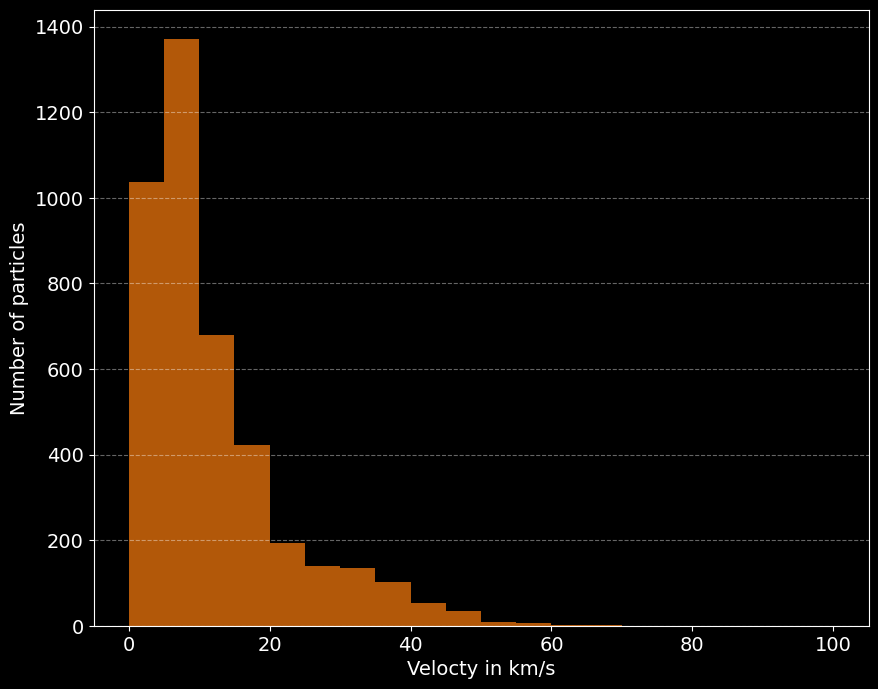

In [15]:
# histogram
plt.figure(figsize=(10,8))

plt.hist(cal_df["PSU_VEL"], bins=np.arange(0,105,5), color="tab:orange", alpha=0.7)

plt.grid(axis="y", ls="dashed", alpha=0.4)

plt.ylabel("Number of particles")
plt.xlabel("Velocty in km/s")

In [16]:
cal_df["MASS"].head()

0    1.664685e-17
1    2.596338e-17
2    2.322057e-17
3    9.721189e-18
4    6.710744e-17
Name: MASS, dtype: float64

Text(0, 0.5, 'Velocity in km/s')

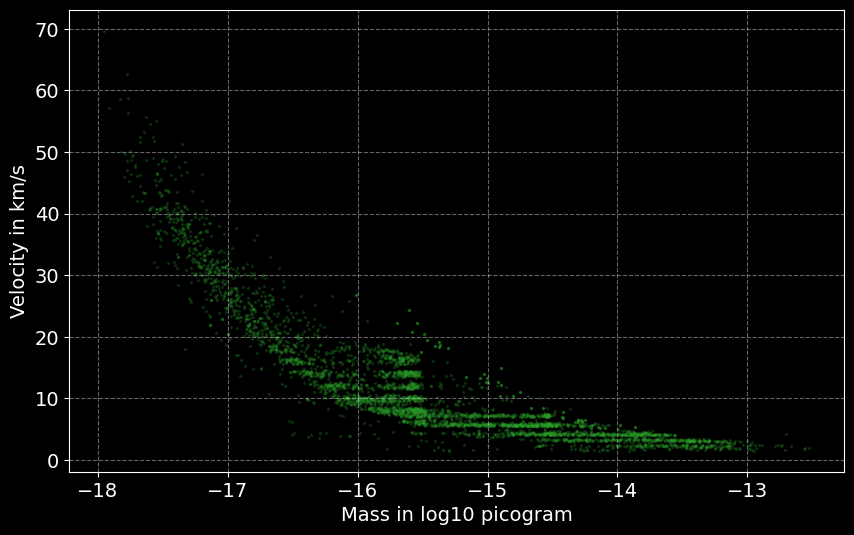

In [17]:
# the dependency of mass and velocity
plt.figure(figsize=(10, 6))

plt.scatter(np.log10(cal_df["MASS"]), cal_df["PSU_VEL"],
            s=2, alpha=0.2, color="tab:green")

plt.grid(linestyle="dashed", alpha=0.4)

# plt.xlim(-5, 5)

plt.xlabel("Mass in log10 picogram")
plt.ylabel("Velocity in km/s")


In [18]:
# some statistics
cal_df.describe()

,PSU_VEL,PSU_CHARGE,MP_PEAKS,ACC,QI_CHARGE,QI_TR,QC_CHARGE,QC_TR,QT_CHARGE,QT_TR,MASS
count,4184.000000,4184.000000,4184.000000,4.184000e+03,4.184000e+03,4184.000000,4.184000e+03,4184.000000,4.184000e+03,4184.000000,4.184000e+03
mean,11.958052,18.576932,2.720841,1.980712e+06,1.206740e+15,23.313769,2.531788e+15,8.747029,7.193117e+15,24.807462,5.345440e-15
std,10.021813,31.740188,4.567028,1.256810e+05,1.086459e+16,21.297661,1.562995e+16,10.247311,2.570089e+16,24.764568,1.650087e-14
min,1.510000,0.133000,0.000000,1.000000e+06,-1.013910e+01,-0.330000,-1.215210e+01,0.000000,-8.681840e+00,-159.670000,1.118135e-18
25%,5.280000,2.633400,0.000000,2.000000e+06,6.263370e+00,5.000000,5.232852e+01,1.000000,4.811652e+00,0.000000,7.119019e-17
50%,8.140000,7.000000,0.000000,2.000000e+06,1.626825e+01,13.830000,1.352600e+02,2.830000,2.686400e+01,20.670000,2.878345e-16
75%,15.827500,20.308925,4.000000,2.000000e+06,4.628210e+01,43.170000,3.190900e+02,16.000000,1.330825e+02,45.340000,2.818315e-15
max,69.700000,900.000000,20.000000,2.000000e+06,9.900000e+16,105.670000,9.900000e+16,58.840000,9.900000e+16,118.000000,2.976114e-13


In [19]:
# focus on iid
iid_cal_df = cal_df.loc[cal_df["TAR"] == "IID"]

iid_qi_cal_df = iid_cal_df.loc[(iid_cal_df["QI_TR"] > 0.0)
                               & (iid_cal_df["QI_CHARGE"] > 0.0)]

iid_qt_cal_df = iid_cal_df.loc[(iid_cal_df["QT_TR"] > 0.0)
                               & (iid_cal_df["QT_CHARGE"] > 0.0)]

iid_good_cal_df = iid_cal_df.loc[(iid_cal_df["QI_TR"] > 0.0)
                                 & (iid_cal_df["QI_CHARGE"] > 0.0)
                                 & (iid_cal_df["QT_TR"] > 0.0)
                                 & (iid_cal_df["QT_CHARGE"] > 0.0)]


In [20]:
# Focus on CAT
cat_cal_df = cal_df.loc[cal_df["TAR"]=="CAT"]

cat_qi_cal_df = cat_cal_df.loc[(cat_cal_df["QI_TR"] > 0.0)
                               & (cat_cal_df["QI_CHARGE"] > 0.0)
                               & (cat_cal_df["MP_PEAKS"] >= 2.0)]

cat_qc_cal_df = cat_cal_df.loc[(cat_cal_df["QC_TR"] > 0.0)
                               & (cat_cal_df["QC_CHARGE"] > 0.0)
                               & (cat_cal_df["MP_PEAKS"] >= 2.0)]

cat_good_cal_df = cat_cal_df.loc[(cat_cal_df["QI_TR"] > 0.0)
                                 & (cat_cal_df["QI_CHARGE"] > 0.0)
                                 & (cat_cal_df["QC_TR"] > 0.0)
                                 & (cat_cal_df["QC_CHARGE"] > 0.0)
                                 & (cat_cal_df["MP_PEAKS"] >= 2.0)]


In [21]:
# Create level1 data
pathlib.Path("../data/level1").mkdir(parents=True, exist_ok=True)
cal_df.to_pickle("../data/level1/CDA__CAT_IID_cal_data.pkl")